# SQL Queries Used
```sql
-- Network Domain session counts for the last 2 days
SELECT 
    app_version,
    sdk_version,
    domain,
    COUNTDistinct(session_id) AS session_count
FROM 
(
    SELECT 
        session_id,
        app_version,
        sdk_version,
        domain
    FROM network
    WHERE (app_id = 'DiFBd') AND (date >= (now() + toIntervalDay(-2))) AND (domain IN ('aero-stage.textnow.com', 'api.textnow.me', 'event-dev.textnow.me', 'event.textnow.me', 'media.textnow.com', 'qos.textnow.me', 'rpc-dev.textnow.me', 'rpc.textnow.me', 'static.textnow.com', 'textnow.com', 'tnqa.textnow.me', 'tnstage.textnow.me', 'tntest.textnow.me'))
) AS network
GROUP BY 
    app_version,
    sdk_version,
    domain
ORDER BY 
    app_version DESC,
    domain ASC,
    session_count ASC
LIMIT 10
FORMAT Vertical
;
```

In [8]:
import pandas as pd
from pandasql import sqldf
import seaborn as sns

In [2]:
first_party_domains = pd.read_csv('/Users/embrace/Documents/data-analysis/data-sources/DiFBd_texnow_network_last_2_days.csv')
first_party_domains

,app_version,sdk_version,domain,session_count
0,21.15.0.1,4.7.0,api.textnow.me,8
1,21.24.1.0,4.7.0,api.textnow.me,23
2,21.22.0.0,4.7.0,api.textnow.me,23
3,21.32.0.0,4.7.0,api.textnow.me,138
4,21.37.0.0,4.9.3,api.textnow.me,151
...,...,...,...,...
284,21.34.0.0,4.9.3,static.textnow.com,8557
285,21.14.0.0,4.7.0,static.textnow.com,12236
286,21.37.0.2,4.9.3,static.textnow.com,14719
287,21.39.0.1,4.9.3,static.textnow.com,22138


In [3]:
pysqldf = lambda q: sqldf(q, globals())

In [4]:
q = """
SELECT * 
FROM first_party_domains
ORDER BY 
    app_version DESC,
    domain,
    session_count
"""
df_sorted = pysqldf(q)
df_sorted

,app_version,sdk_version,domain,session_count
0,22.1.0.0,4.11.0,static.textnow.com,3
1,21.9.2.0,4.6.5,api.textnow.me,6122
2,21.9.2.0,4.6.5,media.textnow.com,606
3,21.9.2.0,4.6.5,qos.textnow.me,520
4,21.9.2.0,4.6.5,rpc.textnow.me,1125
...,...,...,...,...
284,21.10.0.1,4.7.0,api.textnow.me,10045
285,21.10.0.1,4.7.0,media.textnow.com,876
286,21.10.0.1,4.7.0,qos.textnow.me,911
287,21.10.0.1,4.7.0,rpc.textnow.me,1880


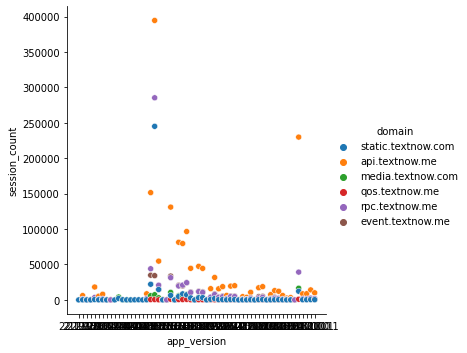

In [14]:
sns.relplot(x='app_version', y='session_count', hue='domain', data=df_sorted)


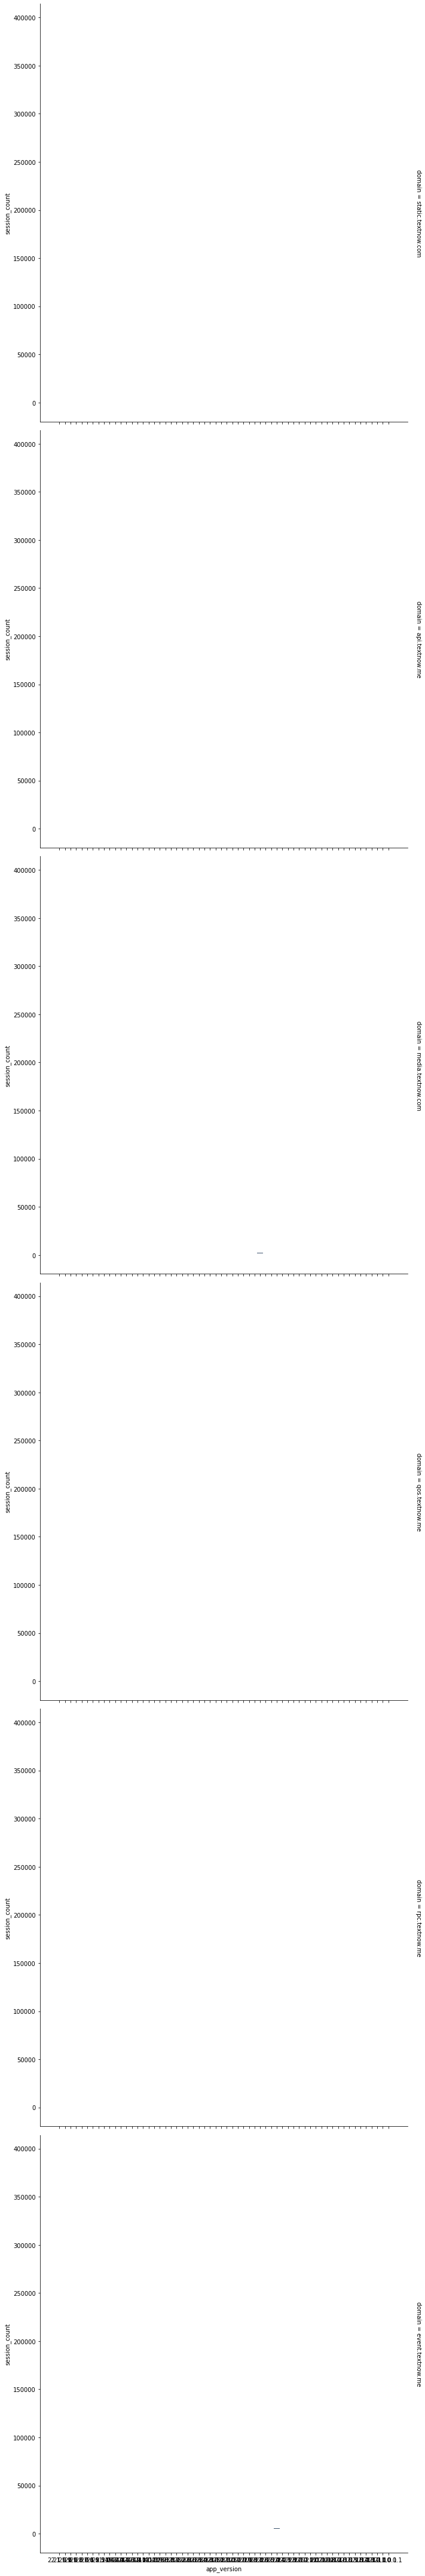

In [19]:
sns.displot(
    df_sorted, x='app_version', y='session_count', row='domain',
    binwidth=3, height=10, facet_kws=dict(margin_titles=True),
)